# Mock plots for mid-semester opioid project

In [1]:
import pandas as pd
from plotnine import *
import os

os.chdir("/users/nick/github/practicaldatascience/midsemester_project")


In [2]:
success_model = pd.DataFrame(
    {
        "Policy Change": [True] * 6 + [False] * 6,
        "Years from Policy Change": [-3, -2, -1, 0, 1, 2] * 2,
        "Opioids Per Cap": [6, 6.2, 6.4, 6.2, 6.0, 5.8, 7, 7.2, 7.4, 7.6, 7.8, 8],
    }
)
success_model


,Policy Change,Years from Policy Change,Opioids Per Cap
0,True,-3,6.0
1,True,-2,6.2
2,True,-1,6.4
3,True,0,6.2
4,True,1,6.0
5,True,2,5.8
6,False,-3,7.0
7,False,-2,7.2
8,False,-1,7.4
9,False,0,7.6


In [3]:
failed_model = pd.DataFrame(
    {
        "Policy Change": [True] * 6 + [False] * 6,
        "Years from Policy Change": [-3, -2, -1, 0, 1, 2] * 2,
        "Opioids Per Cap": [6, 6.2, 6.4, 6.6, 6.8, 7, 7, 7.2, 7.4, 7.6, 7.8, 8],
    }
)
failed_model


,Policy Change,Years from Policy Change,Opioids Per Cap
0,True,-3,6.0
1,True,-2,6.2
2,True,-1,6.4
3,True,0,6.6
4,True,1,6.8
5,True,2,7.0
6,False,-3,7.0
7,False,-2,7.2
8,False,-1,7.4
9,False,0,7.6


## Pre-Post

/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: images/prepost_successful.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


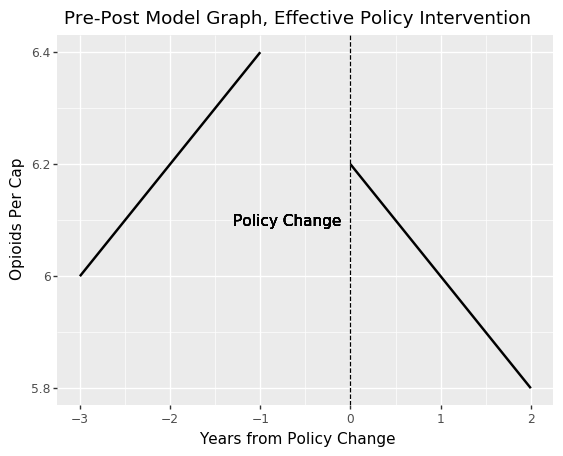

<ggplot: (8782395359033)>


In [4]:
treated_success = success_model[success_model["Policy Change"]]
g = (
    ggplot(treated_success, aes(x="Years from Policy Change", y="Opioids Per Cap"))
    + geom_smooth(
        method="lm",
        data=treated_success[treated_success["Years from Policy Change"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=treated_success[treated_success["Years from Policy Change"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention")
)
g.save("images/prepost_successful.pdf")
print(g)


/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: images/prepost_failed.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


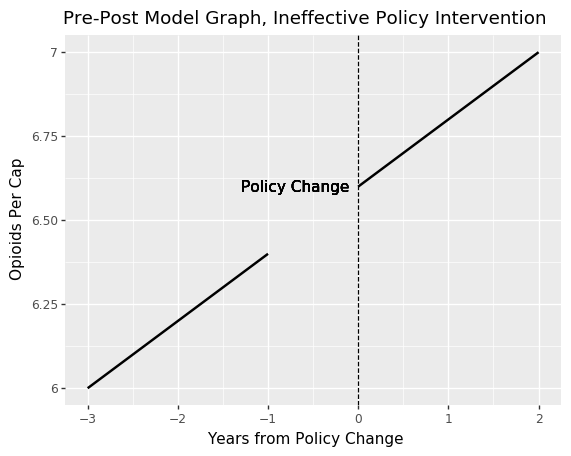

<ggplot: (-9223363254459422190)>


In [5]:
treated_failed = failed_model[failed_model["Policy Change"]]
g = (
    ggplot(treated_failed, aes(x="Years from Policy Change", y="Opioids Per Cap"))
    + geom_smooth(
        method="lm",
        data=treated_failed[treated_failed["Years from Policy Change"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=treated_failed[treated_failed["Years from Policy Change"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.6, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Ineffective Policy Intervention")
)
g.save("images/prepost_failed.pdf")
print(g)


## Diff-in-Diff

/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: images/diffindiff_successful.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


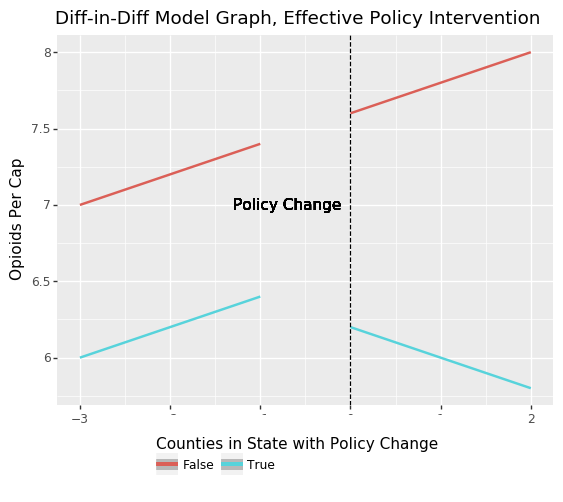

<ggplot: (-9223363254459422120)>


In [6]:
g = (
    ggplot(
        success_model,
        aes(x="Years from Policy Change", y="Opioids Per Cap", color="Policy Change"),
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy Change", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
g.save("images/diffindiff_successful.pdf")
print(g)


/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: images/diffindiff_failed.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


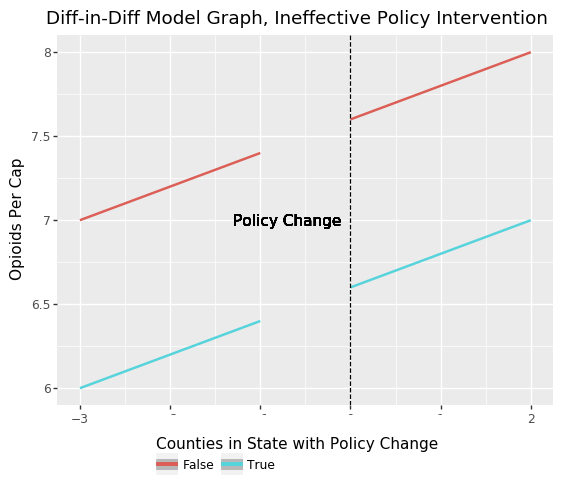

<ggplot: (8782445241152)>


In [8]:
g = (
    ggplot(
        failed_model,
        aes(x="Years from Policy Change", y="Opioids Per Cap", color="Policy Change"),
    )
    + geom_smooth(
        method="lm", data=failed_model[failed_model["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=failed_model[failed_model["Years from Policy Change"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy Change", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Ineffective Policy Intervention",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
g.save("images/diffindiff_failed.pdf")
print(g)


## Diff-in-diff without parallel trends

In [12]:
non_parallel = pd.DataFrame(
    {
        "Policy Change": [True] * 6 + [False] * 6,
        "Years from Policy Change": [-3, -2, -1, 0, 1, 2] * 2,
        "Opioids Per Cap": [7, 6.8, 6.6, 6.4, 6.2, 6, 7, 7.2, 7.4, 7.6, 7.8, 8],
    }
)
non_parallel


,Policy Change,Years from Policy Change,Opioids Per Cap
0,True,-3,7.0
1,True,-2,6.8
2,True,-1,6.6
3,True,0,6.4
4,True,1,6.2
5,True,2,6.0
6,False,-3,7.0
7,False,-2,7.2
8,False,-1,7.4
9,False,0,7.6


/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: images/diffindiff_non_parallel.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Nick/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


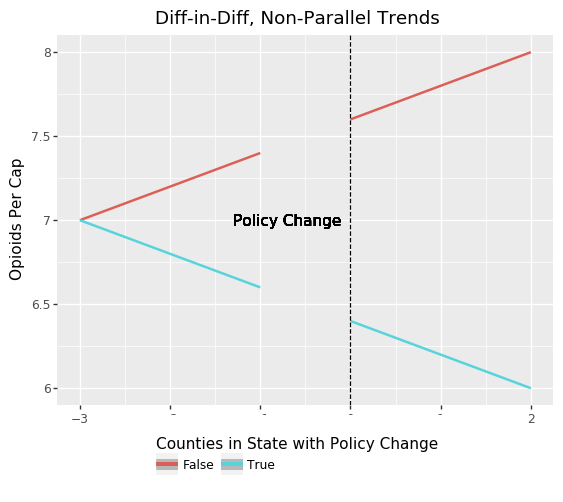

<ggplot: (8782344896744)>


In [14]:
g = (
    ggplot(
        non_parallel,
        aes(x="Years from Policy Change", y="Opioids Per Cap", color="Policy Change"),
    )
    + geom_smooth(
        method="lm", data=non_parallel[non_parallel["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=non_parallel[non_parallel["Years from Policy Change"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy Change", color="black")
    + labs(
        title="Diff-in-Diff, Non-Parallel Trends",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
g.save("images/diffindiff_non_parallel.pdf")
print(g)
